In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from load_data import GetZeoliteTsv
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import os
np.random.seed(1)

In [12]:
#zeolite datafile exported from excel
zeolite_fname = "/home/drewx/Documents/Project-Roger-Dodger/Python-ML/zeolites database one febl14.txt"
#filename for datafile
zeolite_outfile = "ZeoX_Final_encoded.tsv" 

In [13]:
#open the raw tsv data file 
#the file has to be correctly formatted with columns headers  
zeolite_fileObj = open(zeolite_fname)

In [14]:
#create an instance to start processing the datafile
getZeo = GetZeoliteTsv(zeolite_fileObj)

In [15]:
#Sanity check of datatypes
#important to recognise that datatypes are detected from the files
#this step alsos makes the string variables as categorical variables
getZeo.set_dtypes()

,Adsorbent,SA,Vmicro,Vmeso,pore_size,Si_Al,Na,Ag,Ce,Cu,...,La,Cs,Pd,Nd,adsorbate,C_0,solvent,oil_adsorbent_ratio,Temp,Capacity
0,HFAU-5,NaN,0.2550,0.07,0.8000,2.600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,NaN,n-heptane,100.0,25.0,36.416000
1,HFAU-17,NaN,0.2550,0.13,0.8000,13.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,NaN,n-heptane,20.0,25.0,10.176000
2,HFAU-47,NaN,0.2450,0.11,0.8000,34.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,NaN,n-heptane,20.0,25.0,5.760000
3,CeY,590.00,0.2400,NaN,0.8100,2.100,NaN,NaN,2.62,NaN,...,NaN,NaN,NaN,NaN,TP,4.992000,n-heptane,1000.0,80.0,0.640000
4,CeY,590.00,0.2400,NaN,0.8100,2.100,NaN,NaN,2.62,NaN,...,NaN,NaN,NaN,NaN,BT,4.992000,n-heptane,1000.0,80.0,0.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,36.312849,iso-octane,20.0,30.0,5.767327
303,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,51.326816,iso-octane,20.0,30.0,6.336634
304,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,92.527933,iso-octane,20.0,30.0,6.980198
305,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,142.807263,iso-octane,20.0,30.0,7.376238


In [16]:
#this counts the missing records per column and saves them to provided filename
getZeo.missingness("ZeoX_Final_encoded.miss")

,Feature,Missingness
Adsorbent,Adsorbent,0.00
SA,SA,0.98
Vmicro,Vmicro,8.47
Vmeso,Vmeso,65.80
pore_size,pore_size,42.67
Si_Al,Si_Al,3.91
Na,Na,54.40
Ag,Ag,59.93
Ce,Ce,73.29
Cu,Cu,79.48


In [17]:
#take note of number of columns
getZeo.zeolite_df.shape

(307, 23)

In [18]:
#Drops empty columns inplace
getZeo.zeolite_df.dropna(how='all', axis=1, inplace = True)

In [19]:
#Very that columns have indeed been lost
getZeo.zeolite_df.shape

(307, 19)

In [20]:
#Imputation: step by step for easy debugging
getZeo.GroupMeanImputation('Adsorbent','SA')
#This last step takes care of singletons 
getZeo.MeanImputation('SA')

In [21]:
getZeo.GroupMeanImputation('Adsorbent','Vmicro')
getZeo.MeanImputation('Vmicro')

In [22]:
getZeo.GroupMeanImputation('Adsorbent','Vmeso')
getZeo.MeanImputation('Vmeso')

In [23]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

In [24]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

In [25]:
getZeo.GroupMeanImputation('Adsorbent','Si_Al')
getZeo.MeanImputation('Si_Al')

In [26]:
#Mean imputations only for these variables
#Names from column headers
for var in ["C_0","oil_adsorbent_ratio","Temp"]:
         getZeo.MeanImputation(var)

In [27]:
getZeo.zeolite_df.columns

Index(['Adsorbent', 'SA', 'Vmicro', 'Vmeso', 'pore_size', 'Si_Al', 'Na', 'Ag',
       'Ce', 'Cu', 'Ni', 'Zn', 'Cs', 'adsorbate', 'C_0', 'solvent',
       'oil_adsorbent_ratio', 'Temp', 'Capacity'],
      dtype='object')

In [28]:
#Fill missing values for metals with zeros
for metal in ['Na', 'Ag', 'Ce', 'Cu', 'Ni', 'Zn','Cs']:
         getZeo.zerofill(metal)

In [29]:
#convert the categorical variables to intergers also known as one-hot-encoding
#https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
getZeo.encode_categorical()

In [30]:
#save the new data to a tsv file
getZeo.save_zeo("ZeoX_Final_encoded.tsv")

In [31]:
#get our dataframe 
zeolite_final  = getZeo.zeolite_df

In [32]:
#check our dataframe
zeolite_final.shape

(307, 45)

In [33]:
#We extract our data features 
#attributes 
y = zeolite_final.loc[:,"Capacity"].values
#labels
X = zeolite_final.drop(["Capacity"], axis = 1).values

In [34]:
#Split our data into training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
y_train.shape

(245,)

In [36]:
y_test.shape

(62,)

In [37]:
#Standardize features by removing the mean and scaling to unit variasnce
sc = StandardScaler()
#https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models#:~:text=%22fit%22%20computes%20the%20mean%20and,both%20at%20the%20same%20time.
#This should not make much of a difference but its good practice
#TO DO
#Compare accuracy with and without scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
n_trees = 10
n_feat = 31
#max_features=n_features,
regressor = RandomForestRegressor(n_estimators = 10, min_samples_split = 2, min_samples_leaf = 1, max_features = 37, max_depth = 28, random_state=1000)
#TO DO
#increase n_estimators
#run in parallel

In [52]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=28, max_features=37, n_estimators=10,
                      random_state=1000)

In [53]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 28,
 'max_features': 37,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1000,
 'verbose': 0,
 'warm_start': False}

In [54]:
y_pred = regressor.predict(X_test)

In [55]:
plot_data = pd.DataFrame.from_dict({'y_pred': y_pred, 'y_test': y_test, 'errors': y_pred - y_test, 'abs_errors': abs(y_pred - y_test)})
plot_data.to_csv("RF_model_performance.tsv", sep = "\t", index = False)

In [56]:
pd.options.display.max_rows = 4000


In [57]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared = False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2 =  metrics.r2_score(y_test, y_pred)

In [58]:
data_table = pd.DataFrame.from_dict({"n_feat": [n_feat],
                                    "n_trees":[n_trees],
                                     "mae": [mae], 
                                     "mse": [mse], 
                                     "rmse":[rmse],
                                     "r2":[r2],
                                     "mape":[mape]})

In [59]:
data_table

,n_feat,n_trees,mae,mse,rmse,r2,mape
0,31,10,4.690458,75.919566,8.713183,0.949692,7.964171


In [60]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

In [61]:
print("Correlation coefficient (R): {:.4f} ".format(r_value))
print("p-value : {}".format(p_value))
print("Intercept: {:.4f}".format(intercept))
print("Slope: {:.4f}".format(slope))
print("std_error: {:.4f}".format(std_err))

Correlation coefficient (R): 0.9763 
p-value : 1.3835407076593222e-41
Intercept: 3.1652
Slope: 0.9677
std_error: 0.0277


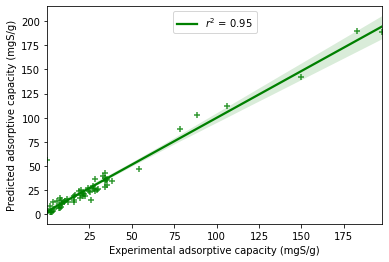

'/home/drewx/Documents/Project-Roger-Dodger/Python-ML'

In [63]:
ax = sns.regplot(y="y_pred",
                 x="y_test", 
                 color="g", 
                 marker="+",
                 line_kws={'label':'$r^2$ = {:.2f}'.format(r_value**2)},
                 data = plot_data)

plt.ylabel('Predicted adsorptive capacity (mgS/g)')
plt.xlabel('Experimental adsorptive capacity (mgS/g)')
ax.legend(loc=9)
plt.savefig('traning_r2.pdf', format='pdf', dpi=1200)
plt.show()
os.getcwd()

In [64]:
feature_importance = pd.DataFrame(data = {"features":zeolite_final.drop(["Capacity"], axis = 1).columns, "importance":regressor.feature_importances_} )
feature_importance.to_csv("Rf_feature_importance", sep = "\t", index = False)

In [65]:
?regressor.feature_importances_

In [66]:
feature_importance["importance"] = round(feature_importance["importance"],5)

In [67]:
sum(feature_importance.importance)

0.9999999999999998

In [68]:
feature_importance.sort_values("importance", ascending=False)

,features,importance
7,Ce,0.30484
2,Vmeso,0.23766
12,C_0,0.16793
6,Ag,0.09550
34,TP,0.04541
3,pore_size,0.03444
4,Si_Al,0.03364
41,n-Octane,0.02496
1,Vmicro,0.01593
0,SA,0.01272


In [69]:
result = permutation_importance(regressor, X_train, y_train)

In [70]:
#result.importances_mean

In [71]:
feature_importance_PI = pd.DataFrame(data = {"features":zeolite_final.drop(["Capacity"], axis = 1).columns, 
                                          "importance_mean":result.importances_mean,
                                          "importance_std": result.importances_std} )
feature_importance_PI.to_csv("RF_feature_importance_PI.tsv", sep = "\t", index = False)

In [72]:
?result.importances_mean

In [73]:
feature_importance_PI["importance_mean"] = round(feature_importance_PI["importance_mean"], 5)

In [346]:
feature_importance_PI.sort_values("importance_mean", ascending=False)

,features,importance_mean,importance_std
12,C_0,0.36344,2.319110e-02
2,Vmeso,0.36299,1.552827e-02
7,Ce,0.35343,2.657719e-02
34,TP,0.07156,4.716304e-03
6,Ag,0.03424,2.882292e-03
4,Si_Al,0.02790,3.002129e-03
14,Temp,0.01392,1.492745e-03
5,Na,0.00951,1.426133e-03
0,SA,0.00927,1.417817e-03
42,n-Octane,0.00832,1.781730e-03


In [74]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = list(range(1,20))
# Number of features to consider at every split
max_features = list(range(1,40))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 40, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree

In [75]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [76]:
random_grid

{'n_estimators': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19],
 'max_features': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 'max_depth': [20, 22, 24, 26, 28, 31, 33, 35, 37, 40, None],
 'min_samples_split': [1, 2, 4],
 'min_samples_leaf': [1, 2, 4]}

In [77]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/opt/miniconda3/envs/py3k/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.87257047 0.94371664 0.94798358        nan
        nan        nan 0.93129745        nan        nan 0.91367928
 0.96401647 0.95877574        nan 0.90089824        nan        nan
 0.85351904 0.95439076        nan 0.90859267        nan 0.84105283
        nan 0.95940211        nan        nan 0.75955528 0.95246268
 0.94748152        nan        nan 0.92234694 0.95427014        nan
 0.91179519        nan 0.93040505 0.94206281 0.89117786        nan
        nan 0.8992349  0.93965595 0.82955141 0.94438749 0.88622399
        nan        nan 0.94181713 0.80796526        nan 0.95059581
        nan        nan 0.91758461 0.92623489 0.85227096        nan
 0.89074529        nan 0.9637729  0.95395427 0.9436467  0.9395138
 0.89922978 0.9496944  0.93683239        nan 0.93093462 0.7841711
        nan        nan        nan        nan

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 22, 24, 26, 28, 31,
                                                      33, 35, 37, 40, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 4],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                    

In [78]:
rf_random.best_params_

{'n_estimators': 19,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 38,
 'max_depth': 37}

In [79]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [80]:
base_model = RandomForestRegressor(n_estimators=n_trees, max_features=n_feat, random_state=42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 5.9680 degrees.
Accuracy = -685.65%.


In [81]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

Model Performance
Average Error: 2.4959 degrees.
Accuracy = 48.52%.
